In [58]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import pickle

In [2]:
df = pd.read_csv('data/purchase data.csv')
df.head()
# incidence - did customer buy choc bar?
# brand - brand of bar
# quantity

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [3]:
df.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

### Importing pickle files from segmentation analysis

In [4]:
pca = pickle.load(open('data/pca.pickle', 'rb'))
kmeans_pca = pickle.load(open('data/kmeans-pca.pickle', 'rb'))
scaler = pickle.load(open('data/scaler.pickle', 'rb'))

In [5]:
feats = df.iloc[:, 17:]  # getting same feats from seg analysis (last 7 cols of this dataset)
feats

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,47,1,110866,1,0
1,0,0,47,1,110866,1,0
2,0,0,47,1,110866,1,0
3,0,0,47,1,110866,1,0
4,0,0,47,1,110866,1,0
...,...,...,...,...,...,...,...
58688,0,0,42,1,120946,1,0
58689,0,0,42,1,120946,1,0
58690,0,0,42,1,120946,1,0
58691,0,0,42,1,120946,1,0


In [6]:
feats = scaler.transform(feats)
feats_pca = pca.transform(feats)

C:\Users\lyons\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [7]:
puchasing_segments = kmeans_pca.predict(feats_pca)

In [8]:
df['Segments'] = puchasing_segments

In [9]:
df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segments
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


In [10]:
cust_counts = df[['ID', 'Incidence']].groupby('ID').count()
cust_counts.columns = ['n_visits']
cust_counts.head()

,n_visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [11]:
cust_purch = df[['ID', 'Incidence']].groupby('ID').sum()
cust_purch.columns = ['n_purch']
cust_purch.head()

,n_purch
ID,
200000001,9
200000002,11
200000003,10
200000004,11
200000005,13


In [12]:
visits_purchases_df = cust_counts.join(cust_purch)
segments_df = df[['ID','Segments']].groupby('ID').mean()

In [13]:
purchase_info_df = visits_purchases_df.join(segments_df)
purchase_info_df.head()

,n_visits,n_purch,Segments
ID,,,
200000001,101,9,2
200000002,87,11,3
200000003,97,10,2
200000004,85,11,2
200000005,111,13,1


In [14]:
purchase_info_df['avg_n_purch'] = purchase_info_df.n_purch/ purchase_info_df.n_visits
purchase_info_df.head()

,n_visits,n_purch,Segments,avg_n_purch
ID,,,,
200000001,101,9,2,0.089109
200000002,87,11,3,0.126437
200000003,97,10,2,0.103093
200000004,85,11,2,0.129412
200000005,111,13,1,0.117117


In [53]:
bars_dummies = pd.get_dummies(df[df.Brand!=0], prefix = 'Brand', columns = ['Brand'] )

In [54]:
bars_dummies

,ID,Day,Incidence,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Education,Income,Occupation,Settlement size,Segments,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
6,200000001,28,1,2,0,0,1.50,1.90,1.99,2.09,...,1,110866,1,0,2,0,1,0,0,0
11,200000001,58,1,1,0,0,1.39,1.90,1.91,2.12,...,1,110866,1,0,2,0,0,0,0,1
19,200000001,110,1,2,0,0,1.47,1.90,1.99,1.97,...,1,110866,1,0,2,1,0,0,0,0
24,200000001,142,1,1,0,0,1.21,1.35,1.99,2.16,...,1,110866,1,0,2,0,0,0,1,0
29,200000001,183,1,3,0,0,1.46,1.88,1.97,1.89,...,1,110866,1,0,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,6,0,0,1.48,1.89,2.01,2.18,...,1,120946,1,0,2,0,1,0,0,0
58648,200000500,460,1,12,0,0,1.35,1.57,2.02,2.21,...,1,120946,1,0,2,1,0,0,0,0
58674,200000500,641,1,7,0,0,1.50,1.85,2.06,2.24,...,1,120946,1,0,2,0,1,0,0,0
58687,200000500,697,1,6,0,0,1.42,1.51,1.97,2.24,...,1,120946,1,0,2,0,1,0,0,0


In [56]:
mean_bars_segment = bars_dummies[['ID','Segments', 'Brand_1', 'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5']].groupby('ID').mean().groupby('Segments').mean()

<AxesSubplot:ylabel='Segments'>

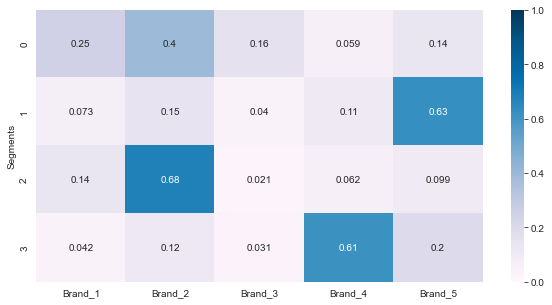

In [60]:
plt.figure(figsize=(10,5))
sns.heatmap(mean_bars_segment, vmin=0, vmax=1, annot=True, cmap='PuBu')